# TODO Needs Comments


In [1]:
import organoid_prediction_python as opp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

translation_frame = pd.read_csv("translation_dataframe_timepoints.csv")
name_mapping = {key:new_key for key,new_key in zip(translation_frame["original_names"],translation_frame["plot_names"])}

home_directory = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation/"
table_location = home_directory + "tabular_data"

translation_frame = pd.read_csv("translation_dataframe_timepoints.csv")
name_mapping = {key:new_key for key,new_key in zip(translation_frame["original_names"],translation_frame["plot_names"])}

data = pd.read_csv(f"{table_location}/All_Samples_Feature_Space_All_Features_48h,72h,96h_Normalised_per_Timepoint.csv")

data_raw = pd.read_csv(f"{table_location}/All_Samples_Feature_Space_All_Features_48h,72h,96h.csv")

data = data.drop("096h_raw_CH_AreaShape_Bra_AreaFraction",axis=1).merge(data_raw[["Run","Plate","ID","096h_raw_CH_AreaShape_Bra_AreaFraction"]],on=["Run","Plate","ID"])

annotations = table_location + "/annotations_with_indices.csv"
annotation_df = pd.read_csv(annotations)
mapping = {"Real_Run":"RR", "Trial_Run":"TR"}
annotation_df["Run"] = [mapping[value] for value in annotation_df["Run"].to_numpy()]
no_na_annot = annotation_df[annotation_df["Morph_Class"]!="NA_NA"]

data_annotated = data.set_index(["Run","Plate","ID"]).merge(no_na_annot,on=["Run","Plate","ID"])
data_annotated = data_annotated[data_annotated["Run"]=="RR"]
data_annotated

,Run,Plate,ID,048h_raw_BF_AreaShape_area,048h_raw_BF_AreaShape_aspect_ratio,048h_raw_BF_AreaShape_axis_major_length,048h_raw_BF_AreaShape_axis_minor_length,048h_raw_BF_AreaShape_eccentricity,048h_raw_BF_AreaShape_feret_diameter_max,048h_raw_BF_AreaShape_perimeter,...,096h_str_BF_AreaShape_moments_hu_5,096h_str_BF_AreaShape_moments_hu_6,096h_str_BF_AreaShape_orientation,096h_str_BF_AreaShape_perimeter,096h_str_CH_AreaShape_Bra_MajorAxis_Polarisation,096h_str_CH_AreaShape_Bra_MinorAxis_Polarisation,096h_raw_CH_AreaShape_Bra_AreaFraction,Axes,Morph,Morph_Class
0,RR,1,A1,0.754091,-0.889636,0.132588,1.204628,-1.000051,0.007074,0.615519,...,-0.108285,-0.018937,0.218694,0.485603,-0.237483,0.204173,0.881780,single,good,single_good
1,RR,1,A2,-0.783470,-1.252670,-1.238409,0.003129,-1.752936,-1.131530,-0.724230,...,-0.108023,0.017986,-1.310831,-0.276812,-0.930821,1.071650,0.811699,single,bad,single_bad
2,RR,1,A3,1.636441,-0.184192,1.186196,1.565451,-0.008740,1.127225,1.795347,...,-0.108504,-0.019001,-0.638784,0.014028,0.406917,-0.068697,0.854586,single,bad,single_bad
3,RR,1,A4,-0.525754,-0.513477,-0.672134,-0.202863,-0.422446,-0.849309,-0.402853,...,-0.013521,0.038021,0.362758,0.652506,0.992505,-0.551399,0.835696,single,good,single_good
4,RR,1,A5,0.537872,-0.248943,0.294790,0.612413,-0.084969,0.059492,0.498737,...,-0.113141,-0.013480,-0.324894,-1.090064,0.285818,-0.643907,0.375567,single,bad,single_bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,RR,6,H8,1.005255,-1.279210,0.102255,1.665470,-1.821454,-0.023269,0.654958,...,-0.108230,-0.019104,0.393528,0.644635,0.312675,-0.205891,0.764828,single,good,single_good
279,RR,6,H9,0.675466,-0.475101,0.283717,0.871548,-0.370595,0.184787,0.633388,...,-0.073716,-0.030854,0.371249,0.641728,1.649535,-0.522721,0.751000,single,good,single_good
280,RR,6,H10,1.516319,-0.991680,0.663376,1.969819,-1.185465,0.594001,1.682265,...,-0.242615,-1.813680,-0.556590,1.517094,0.040732,-0.462297,0.599907,single,good,single_good
281,RR,6,H11,1.029280,0.588546,1.106800,0.558182,0.762775,0.561037,1.023175,...,0.142462,-0.139077,-0.037227,1.302115,1.317646,-1.010120,0.613513,single,unclassified,single_unclassified


In [2]:
sequenced_dataframe = pd.read_csv(f"{table_location}/Morphodata_All_Features_Sequenced_096h.csv")
sequenced_ids = sequenced_dataframe[["Plate","Sample"]].rename(columns={"Sample":"ID"})
sequenced_ids["Run"] = ["RR" for i in range(len(sequenced_ids))]
sequenced_w_features_96 = data.merge(sequenced_ids,on=["Run","Plate","ID"]).rename(columns = name_mapping)
sequenced_w_features_96

,Run,Plate,ID,048h-[Area]-BF,048h-[Aspect Ratio]-BF,048h-[Axis Major Length]-BF,048h-[Axis Minor Length]-BF,048h-[Eccentricity]-BF,048h-[Feret Diameter Max]-BF,048h-[Perimeter]-BF,...,096h-[str Moments Hu 2]-BF,096h-[str Moments Hu 3]-BF,096h-[str Moments Hu 4]-BF,096h-[str Moments Hu 5]-BF,096h-[str Moments Hu 6]-BF,096h-[str Orientation]-BF,096h-[str Perimeter]-BF,096h-[str Major Axis Polarisation]-TmCH,096h-[str Minor Axis Polarisation]-TmCH,096h-[Area Fraction]-TmCH
0,RR,5,A2,1.343781,-1.084053,0.473754,1.861678,-1.368380,0.340415,1.209900,...,-0.416198,-0.185718,-0.081053,-0.108452,-0.018979,1.957737,-0.057015,-0.714090,0.560549,0.833116
1,RR,5,A3,0.780299,-0.728520,0.224086,1.112453,-0.735236,-0.053653,0.906392,...,-0.795341,-0.159206,-0.080922,-0.097875,-0.021843,0.066898,0.400874,1.333237,-0.974813,0.718010
2,RR,5,A4,1.311020,-0.692040,0.672477,1.597554,-0.679235,0.873954,1.188331,...,-0.593281,-0.101873,-0.079644,-0.066206,-0.022051,-0.002443,0.053382,1.488942,-0.834810,0.649614
3,RR,5,A7,-0.019058,0.463679,0.220871,-0.292457,0.652306,-0.132148,0.017438,...,-0.240315,0.156456,-0.064577,0.087304,-0.059926,-0.111953,0.312033,1.231474,-0.612474,0.694089
4,RR,5,A8,1.376541,0.481242,1.312973,0.912816,0.668123,0.970236,1.320366,...,-0.410682,0.025243,-0.075355,-0.021428,0.100229,-0.228387,0.967809,0.961865,-0.501210,0.645744
5,RR,5,B2,0.976863,0.332189,0.944384,0.671604,0.530817,1.153840,0.958466,...,-0.432491,-0.178506,-0.080998,-0.107369,-0.017106,-0.346018,-0.604949,0.725118,-0.612652,0.754782
6,RR,5,B7,1.935654,1.088473,2.049544,1.027973,1.164278,1.493811,1.773777,...,2.948413,-0.185819,-0.081071,-0.108858,-0.018391,0.055563,0.467805,1.460339,-0.580439,0.475875
7,RR,5,C3,-0.383792,-1.330647,-0.959900,0.437953,-1.962592,-0.882101,-0.445993,...,-0.799768,-0.152596,-0.080844,-0.085961,-0.019959,-0.059521,-0.167412,1.508292,-0.626827,0.461114
8,RR,5,D12,1.223659,0.664424,1.283888,0.668633,0.827739,1.106133,1.209900,...,-0.764690,-0.188676,-0.081040,-0.108285,-0.018932,-0.258878,-0.945921,-0.048169,-0.166264,0.792615
9,RR,5,E2,1.348149,-0.001250,1.041189,1.176035,0.195287,0.845889,1.261974,...,-0.616296,-0.186667,-0.081039,-0.108248,-0.018758,-0.353626,-2.250102,-0.328878,0.333339,0.763680


In [18]:
sequenced_dataframe = pd.read_csv(f"{table_location}/Morphodata_All_Features_Sequenced_072h.csv")
sequenced_ids = sequenced_dataframe[["Plate","Sample"]].rename(columns={"Sample":"ID"})
sequenced_ids["barcode"] = [f"Bar{i+1}" for i in range(len(sequenced_ids))]
sequenced_ids["Run"] = ["RR" for i in range(len(sequenced_ids))]
selected_samples = pd.read_csv(f"{table_location}/selected_barcodes_72.csv")
sequenced_ids=sequenced_ids.merge(selected_samples,left_on="barcode",right_on="x")
sequenced_ids

,Plate,ID,barcode,Run,Unnamed: 0,x
0,3,A2,Bar1,RR,1,Bar1
1,3,A3,Bar2,RR,2,Bar2
2,3,A4,Bar3,RR,3,Bar3
3,3,A5,Bar4,RR,4,Bar4
4,3,A6,Bar5,RR,5,Bar5
5,3,A7,Bar6,RR,6,Bar6
6,3,B2,Bar7,RR,7,Bar7
7,3,B4,Bar9,RR,8,Bar9
8,3,B5,Bar10,RR,9,Bar10
9,3,B7,Bar12,RR,10,Bar12


In [19]:
sequenced_w_features_72 = data.merge(sequenced_ids,on=["Run","Plate","ID"]).rename(columns = name_mapping)
sequenced_w_features_72

,Run,Plate,ID,048h-[Area]-BF,048h-[Aspect Ratio]-BF,048h-[Axis Major Length]-BF,048h-[Axis Minor Length]-BF,048h-[Eccentricity]-BF,048h-[Feret Diameter Max]-BF,048h-[Perimeter]-BF,...,096h-[str Moments Hu 5]-BF,096h-[str Moments Hu 6]-BF,096h-[str Orientation]-BF,096h-[str Perimeter]-BF,096h-[str Major Axis Polarisation]-TmCH,096h-[str Minor Axis Polarisation]-TmCH,096h-[Area Fraction]-TmCH,barcode,Unnamed: 0,x
0,RR,3,A2,0.308548,-1.304580,-0.425381,1.056211,-1.889586,-0.249832,-0.034636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bar1,1,Bar1
1,RR,3,A3,1.038016,0.525589,1.083991,0.604916,0.707648,0.823412,0.919028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bar2,2,Bar2
2,RR,3,A4,0.441774,-0.844166,-0.091543,0.880769,-0.922169,-0.163860,0.195229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bar3,3,Bar3
3,RR,3,A5,0.181874,-0.920360,-0.305703,0.719329,-1.054251,-0.419237,0.152089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bar4,4,Bar4
4,RR,3,A6,0.828348,0.285321,0.813337,0.577958,0.486140,0.795285,0.820114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bar5,5,Bar5
5,RR,3,A7,0.417750,0.970682,0.825949,-0.180364,1.074978,0.420685,0.516606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bar6,6,Bar6
6,RR,3,B2,0.304180,0.561728,0.546048,-0.037759,0.739431,0.601951,0.351450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bar7,7,Bar7
7,RR,3,B4,0.765011,-0.048870,0.587533,0.712491,0.143692,0.484694,0.750171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bar9,8,Bar9
8,RR,3,B5,-0.305166,-0.881727,-0.640737,0.272027,-0.986311,-0.369344,-0.273435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bar10,9,Bar10
9,RR,3,B7,1.171242,-0.015819,0.925954,1.061440,0.179609,1.060552,1.249339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bar12,10,Bar12


In [25]:


features_to_plot = [
    '072h_raw_CH__bf_mask_Intensity_MeanIntensity',
    '072h_raw_CH__bf_mask_RadialDistribution_MeanFrac_2of9',
    '096h_raw_CH_AreaShape_Bra_AreaFraction',
    '096h_raw_CH_bra_mask_Intensity_MeanIntensity',
]
features_to_plot = [name_mapping[feat] for feat in features_to_plot]
gt_keys = ["Run","Plate","ID","Morph","Axes","Morph_Class"]
df_96 = data_annotated.rename(columns = name_mapping)[features_to_plot[2:]+gt_keys]
df_72 = data_annotated.rename(columns = name_mapping)[features_to_plot[:2]+gt_keys]

In [26]:
from matplotlib.colors import ListedColormap
cmap_hex = np.load("custom_colormap(blur,orange,red,ice).npy")
cmap = sns.palettes.color_palette(np.append(cmap_hex[:2],"#000000"))
cmap

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.0, 0.0, 0.0)]

meta NOT subset; don't know how to subset; dropped


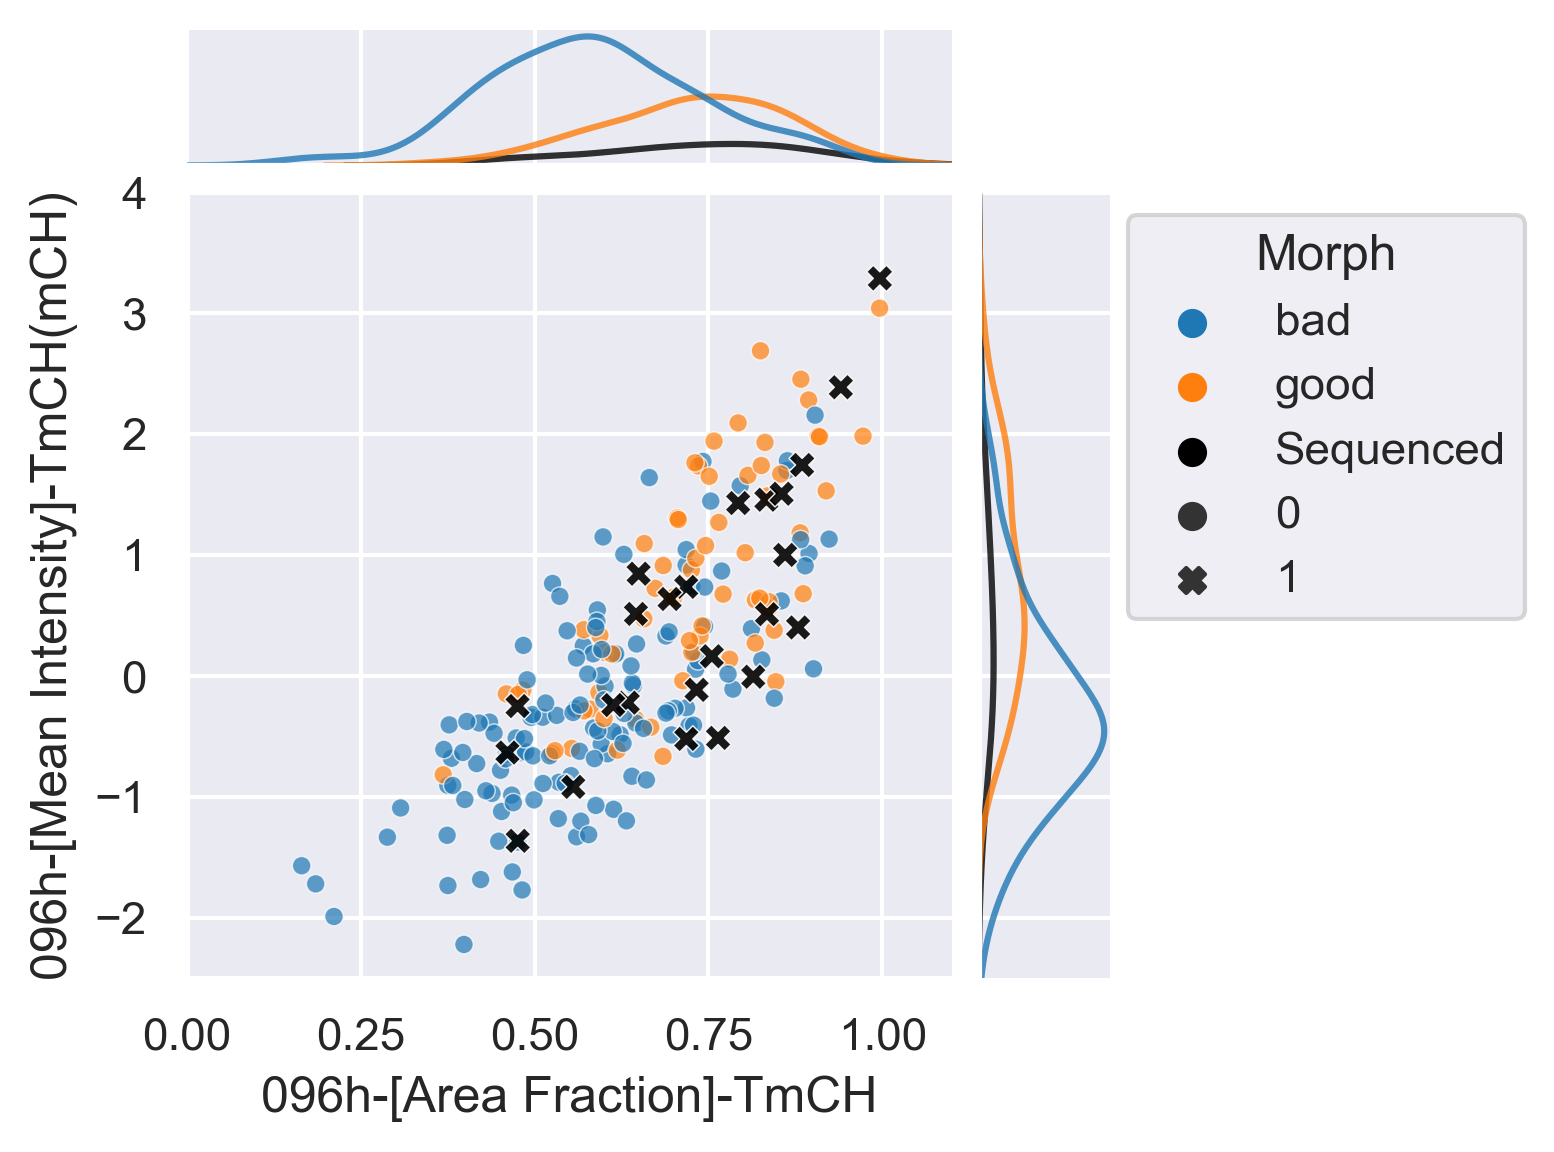

In [27]:
data_96_w_annot = sequenced_w_features_96
data_96_w_annot["Morph"] = ["Sequenced" for i in range(len(data_96_w_annot))]
df_test = pd.concat([df_96[df_96["Morph"]!="unclassified"],data_96_w_annot],axis = 0, ignore_index=True)
converter = {
    "Sequenced":1,
    "good":0,
    "bad":0,
}
sns.set()
g = sns.jointplot(
    df_test,
    x=features_to_plot[2],
    y=features_to_plot[3],
    hue="Morph",
    hue_order=["bad","good","Sequenced"],
    joint_kws={"style":[converter[val] for val in df_test["Morph"]]},
    marginal_kws={"multiple":"layer","fill":False,"alpha":0.8},
    **{
        "alpha":[0.7 + converter[val]*0.2 for val in df_test["Morph"]],
        "s":[20 + converter[val]*20 for val in df_test["Morph"]],
    },
    palette=cmap,
    height = 4,
)

sns.move_legend(g.ax_joint, "upper left", bbox_to_anchor=(1.2, 1.))
#g.ax_joint.scatter(sequenced_w_features_96[features_to_plot[2]],sequenced_w_features_96[features_to_plot[3]],c="black",marker = "x",edgecolor = "black",linewidths=1,alpha = 0.8)
g.ax_joint.set_xlim([0,1.1])
g.ax_joint.set_ylim([-2.5,4])
out_PLSR = f"{home_directory}/Plots/PLSR Feature Plots/"


plt.savefig(f"{out_PLSR}/96h Features w 96h sequenced samples.pdf", format="pdf", bbox_inches="tight")

meta NOT subset; don't know how to subset; dropped


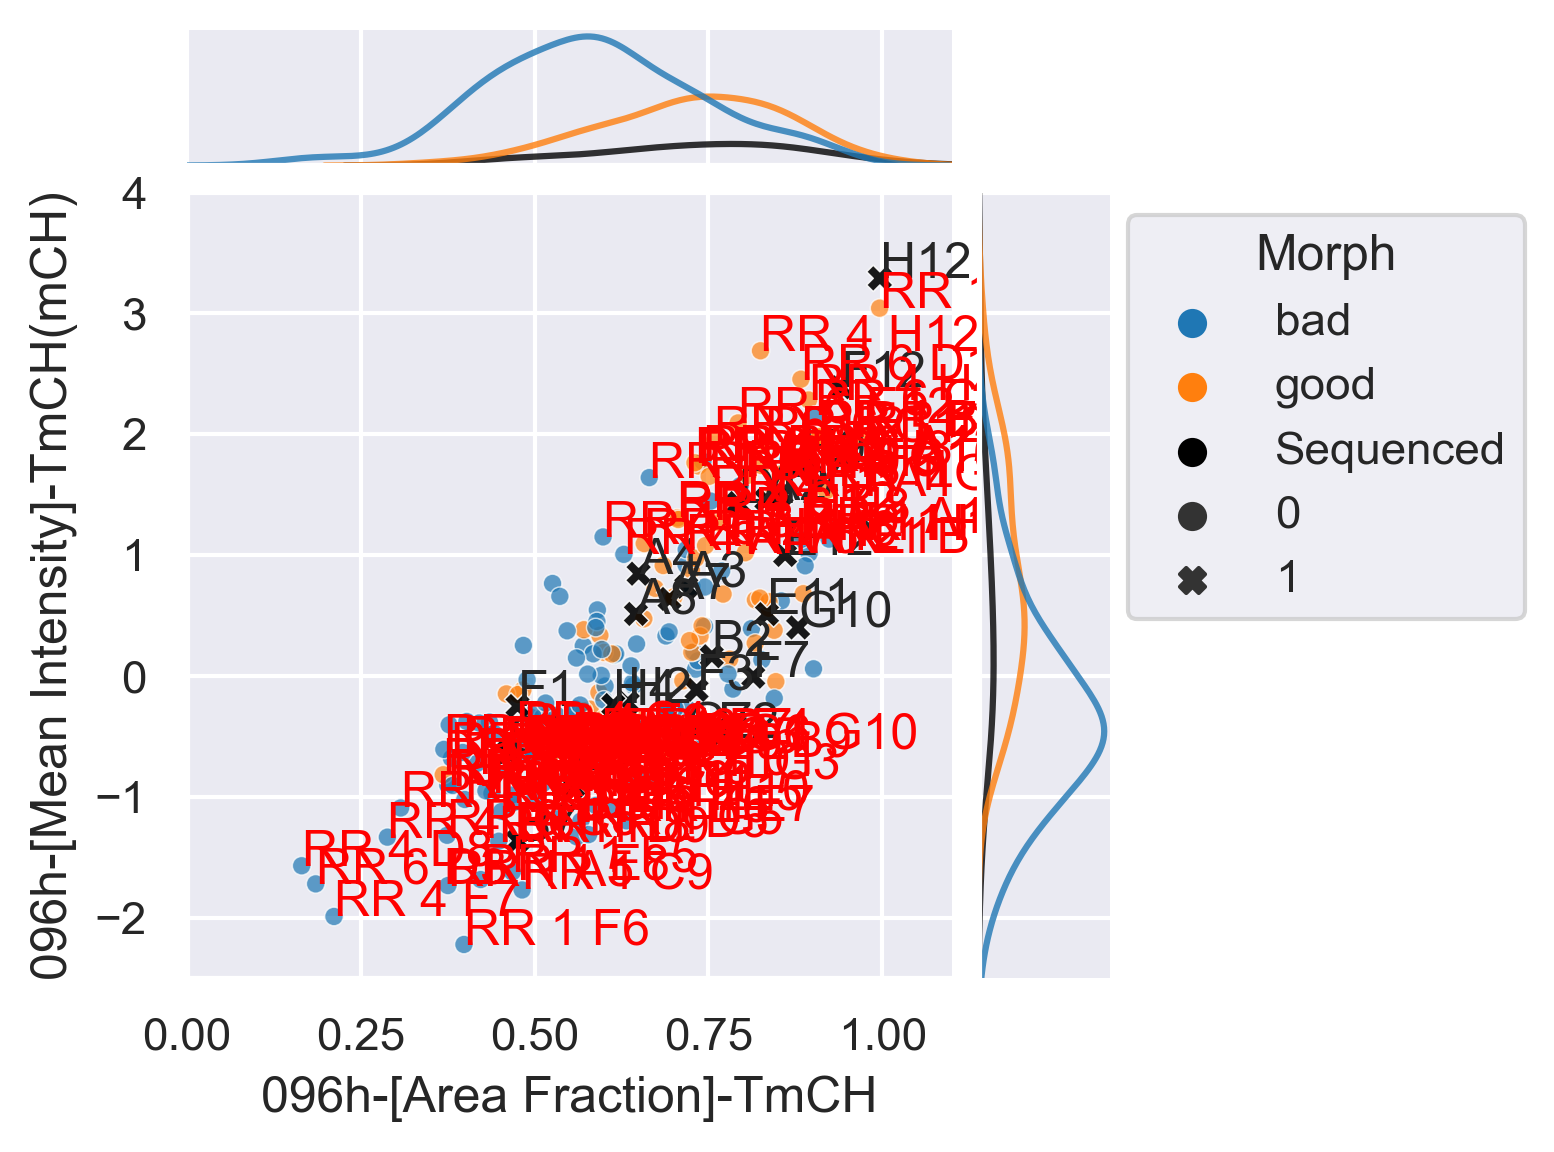

In [28]:
g = sns.jointplot(
    df_test,
    x=features_to_plot[2],
    y=features_to_plot[3],
    hue="Morph",
    hue_order=["bad","good","Sequenced"],
    joint_kws={"style":[converter[val] for val in df_test["Morph"]]},
    marginal_kws={"multiple":"layer","fill":False,"alpha":0.8},
    **{
        "alpha":[0.7 + converter[val]*0.2 for val in df_test["Morph"]],
        "s":[20 + converter[val]*20 for val in df_test["Morph"]],
    },
    palette=cmap,
    height = 4,
)

sns.move_legend(g.ax_joint, "upper left", bbox_to_anchor=(1.2, 1.))
#g.ax_joint.scatter(sequenced_w_features_96[features_to_plot[2]],sequenced_w_features_96[features_to_plot[3]],c="black",marker = "x",edgecolor = "black",linewidths=1,alpha = 0.8)
g.ax_joint.set_xlim([0,1.1])
g.ax_joint.set_ylim([-2.5,4])
out_PLSR = f"{home_directory}/Plots/PLSR Feature Plots/"

for row in df_test[df_test["Morph"]=="Sequenced"][features_to_plot[2:]+["ID"]].itertuples():
    g.ax_joint.annotate(row[3], (row[1], row[2]))
    
for row in df_test[df_test["Morph"]!="Sequenced"][features_to_plot[2:]+["Run","Plate","ID"]].itertuples():
    if row[2] >= 1 or row[2] <= -0.5:
        g.ax_joint.annotate(f"{row[3]} {row[4]} {row[5]}", (row[1], row[2]),**{"c":"red"})
plt.savefig(f"{out_PLSR}/96h Features w 96h sequenced samples annotated.pdf", format="pdf", bbox_inches="tight")

In [29]:
from matplotlib.colors import ListedColormap
cmap_hex = np.load("custom_colormap(blur,orange,red,ice).npy")
cmap = sns.palettes.color_palette(np.append(cmap_hex[:2],["#000000","#006020"]))
cmap

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.0, 0.0, 0.0),
 (0.0, 0.3764705882352941, 0.12549019607843137)]

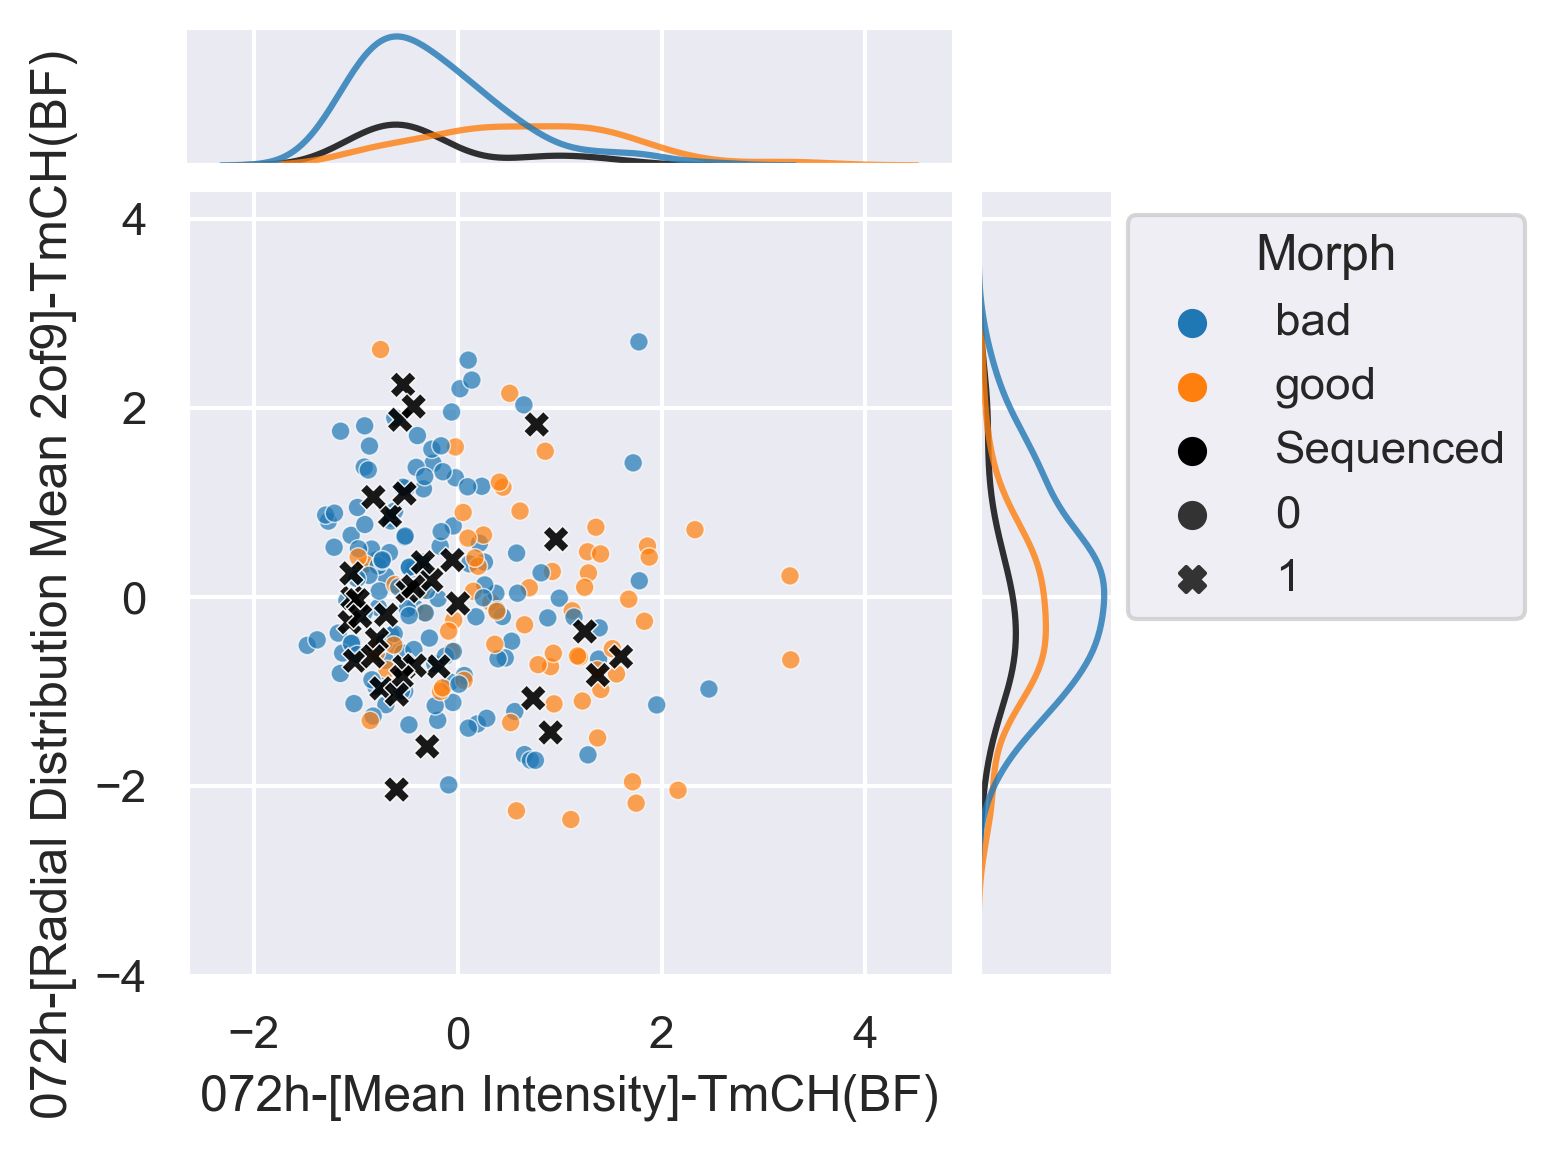

In [35]:
data_96_w_annot = sequenced_w_features_96
data_96_w_annot["Morph"] = ["Sequenced" for i in range(len(data_96_w_annot))]
data_96_w_annot["Sequenced at"] = ["96 h" for i in range(len(data_96_w_annot))]

data_72_w_annot = sequenced_w_features_72
data_72_w_annot["Morph"] = ["Sequenced" for i in range(len(data_72_w_annot))]
data_72_w_annot["Sequenced at"] = ["72 h" for i in range(len(data_72_w_annot))]

df_test_2 = df_72[df_72["Morph"]!="unclassified"]
df_test_2["Sequenced at"] = ["120 h" for i in range(len(df_test_2))]
    
df_test_2 = pd.concat([df_test_2,data_72_w_annot],axis = 0, ignore_index=True)
converter = {
    "Sequenced":1,
    "good":0,
    "bad":0,
}
sns.set()
g = sns.jointplot(
    df_test_2,
    x=features_to_plot[0],
    y=features_to_plot[1],
    hue="Morph",
    hue_order=["bad","good","Sequenced"],
    joint_kws={"style":[converter[val] for val in df_test_2["Morph"]]},
    marginal_kws={"multiple":"layer","fill":False,"alpha":0.8},
    **{
        "alpha":[0.7 + converter[val]*0.2 for val in df_test_2["Morph"]],
        "s":[20 + converter[val]*20 for val in df_test_2["Morph"]],
    },
    palette=cmap,
    height = 4,
)


sns.move_legend(g.ax_joint, "upper left", bbox_to_anchor=(1.2, 1.))



meta NOT subset; don't know how to subset; dropped


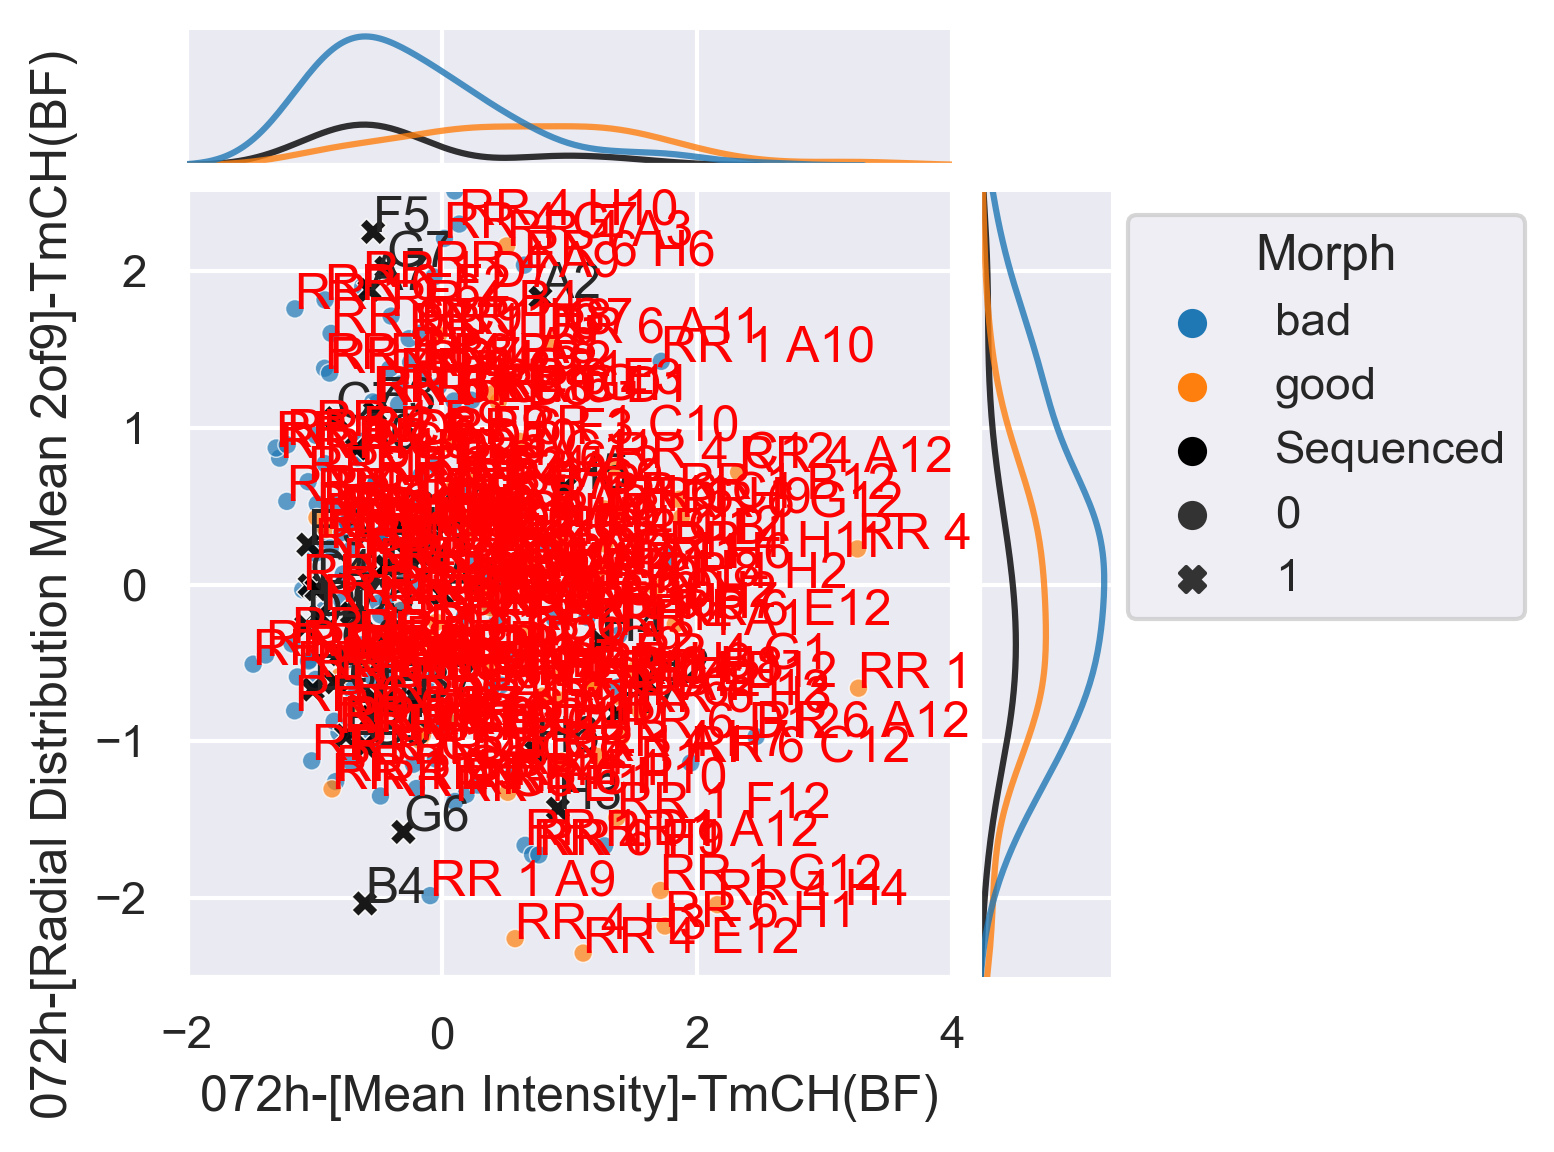

In [36]:
g = sns.jointplot(
    df_test_2,
    x=features_to_plot[0],
    y=features_to_plot[1],
    hue="Morph",
    hue_order=["bad","good","Sequenced"],
    joint_kws={"style":[converter[val] for val in df_test_2["Morph"]]},
    marginal_kws={"multiple":"layer","fill":False,"alpha":0.8},
    **{
        "alpha":[0.7 + converter[val]*0.2 for val in df_test_2["Morph"]],
        "s":[20 + converter[val]*20 for val in df_test_2["Morph"]],
    },
    palette=cmap,
    height = 4,
)

sns.move_legend(g.ax_joint, "upper left", bbox_to_anchor=(1.2, 1.))
#g.ax_joint.scatter(sequenced_w_features_96[features_to_plot[2]],sequenced_w_features_96[features_to_plot[3]],c="black",marker = "x",edgecolor = "black",linewidths=1,alpha = 0.8)
g.ax_joint.set_xlim([-2,4])
g.ax_joint.set_ylim([-2.5,2.5])

out_PLSR = f"{home_directory}/Plots/PLSR Feature Plots/"

for row in df_test_2[df_test_2["Morph"]=="Sequenced"][features_to_plot[:2]+["ID"]].itertuples():
    g.ax_joint.annotate(row[3], (row[1], row[2]))
    
for row in df_test_2[df_test_2["Morph"]!="Sequenced"][features_to_plot[:2]+["Run","Plate","ID"]].itertuples():
    g.ax_joint.annotate(f"{row[3]} {row[4]} {row[5]}", (row[1], row[2]),**{"c":"red"})
plt.savefig(f"{out_PLSR}/72h Features w 72h sequenced samples annotated.pdf", format="pdf", bbox_inches="tight")


In [11]:
from matplotlib import colormaps
tab10 = colormaps["tab10"]
inverted = [tab10(i) for i in range(3,-1,-1)]
cmap_reverse = sns.palettes.color_palette(inverted)
cmap_reverse



[(0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)]

In [12]:
cmap_rev_custom = sns.palettes.color_palette([cmap_hex[i]for i in range(3,-1,-1)])
cmap_rev_custom

[(0.06666666666666667, 0.7490196078431373, 0.6235294117647059),
 (0.7294117647058823, 0.19607843137254902, 0.4),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)]

meta NOT subset; don't know how to subset; dropped


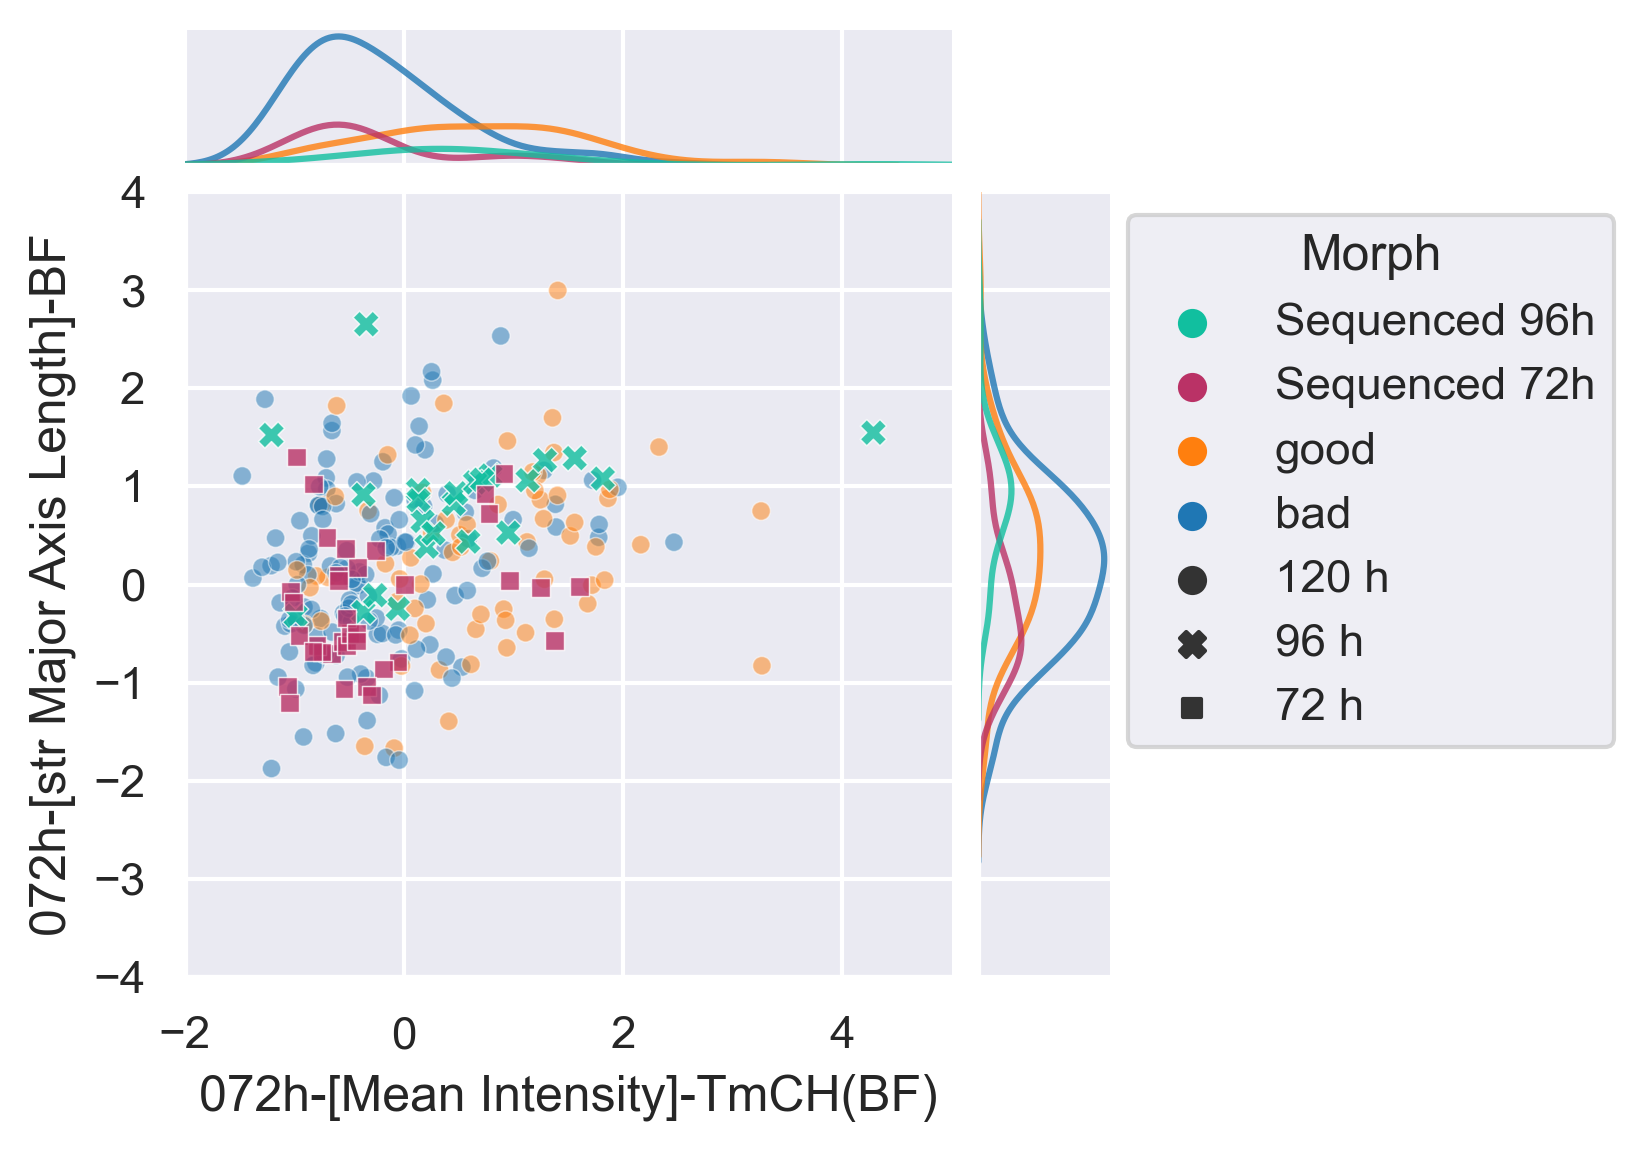

In [13]:
data_96_w_annot = sequenced_w_features_96
data_96_w_annot["Morph"] = ["Sequenced 96h" for i in range(len(data_96_w_annot))]
data_96_w_annot["Sequenced at"] = ["96 h" for i in range(len(data_96_w_annot))]

data_72_w_annot = sequenced_w_features_72
data_72_w_annot["Morph"] = ["Sequenced 72h" for i in range(len(data_72_w_annot))]
data_72_w_annot["Sequenced at"] = ["72 h" for i in range(len(data_72_w_annot))]

df_test_2 = df_72[df_72["Morph"]!="unclassified"]
df_test_2["Sequenced at"] = ["120 h" for i in range(len(df_test_2))]
    
df_test_2 = pd.concat([df_test_2,data_96_w_annot,data_72_w_annot],axis = 0, ignore_index=True)
converter = {
    "Sequenced 96h":1,
    "Sequenced 72h":1,
    "good":0,
    "bad":0,
}
sns.set()
g = sns.jointplot(
    df_test_2,
    x=features_to_plot[0],
    y=features_to_plot[1],
    hue="Morph",
    hue_order=["Sequenced 96h","Sequenced 72h","good","bad",],#["bad","good","Sequenced 72h", "Sequenced 96h"],
    joint_kws={"style":[val for val in df_test_2["Sequenced at"]]},
    marginal_kws={"multiple":"layer","fill":False,"alpha":0.8},
    **{
        "alpha":[0.5 + converter[val]*0.3 for val in df_test_2["Morph"]],
        "s":[20 + converter[val]*20 for val in df_test_2["Morph"]],
    },
    height = 4,
    palette=cmap_rev_custom
)

sns.move_legend(g.ax_joint, "upper left", bbox_to_anchor=(1.2, 1.))
g.ax_joint.set_xlim([-2,5])
g.ax_joint.set_ylim([-4,4])
out_PLSR = f"{home_directory}/Plots/PLSR Feature Plots/"
plt.savefig(f"{out_PLSR}/72h Features w 72h and 96h sequenced samples.pdf", format="pdf", bbox_inches="tight")

meta NOT subset; don't know how to subset; dropped


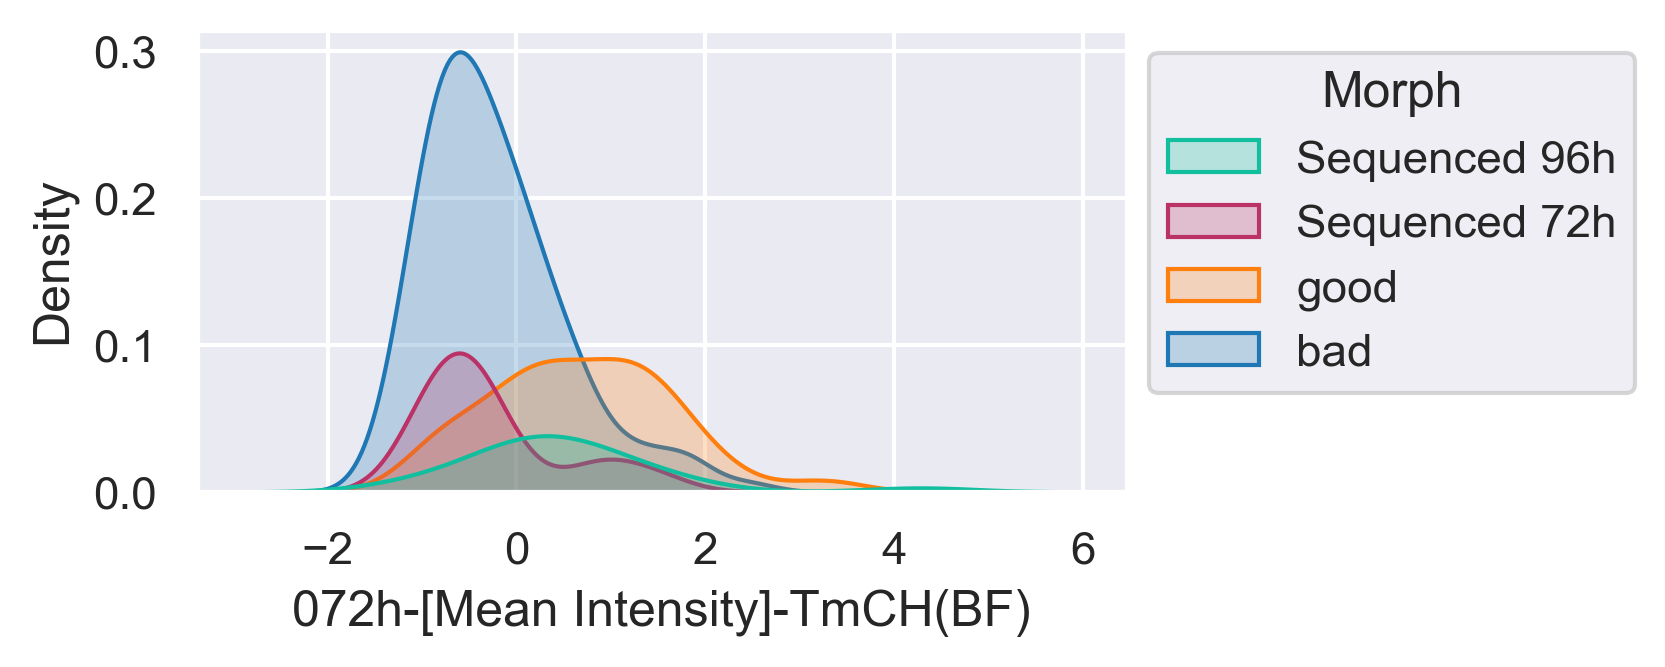

In [14]:
fig,ax = plt.subplots(1,1,figsize = (4,2))
sns.kdeplot(data=df_test_2, x=features_to_plot[0], hue="Morph", multiple='layer', fill=True,palette=cmap_rev_custom,hue_order=["Sequenced 96h","Sequenced 72h","good","bad",],ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig(f"{out_PLSR}/72h Mean Intensity w 72h and 96h sequenced samples.pdf", format="pdf", bbox_inches="tight")

meta NOT subset; don't know how to subset; dropped


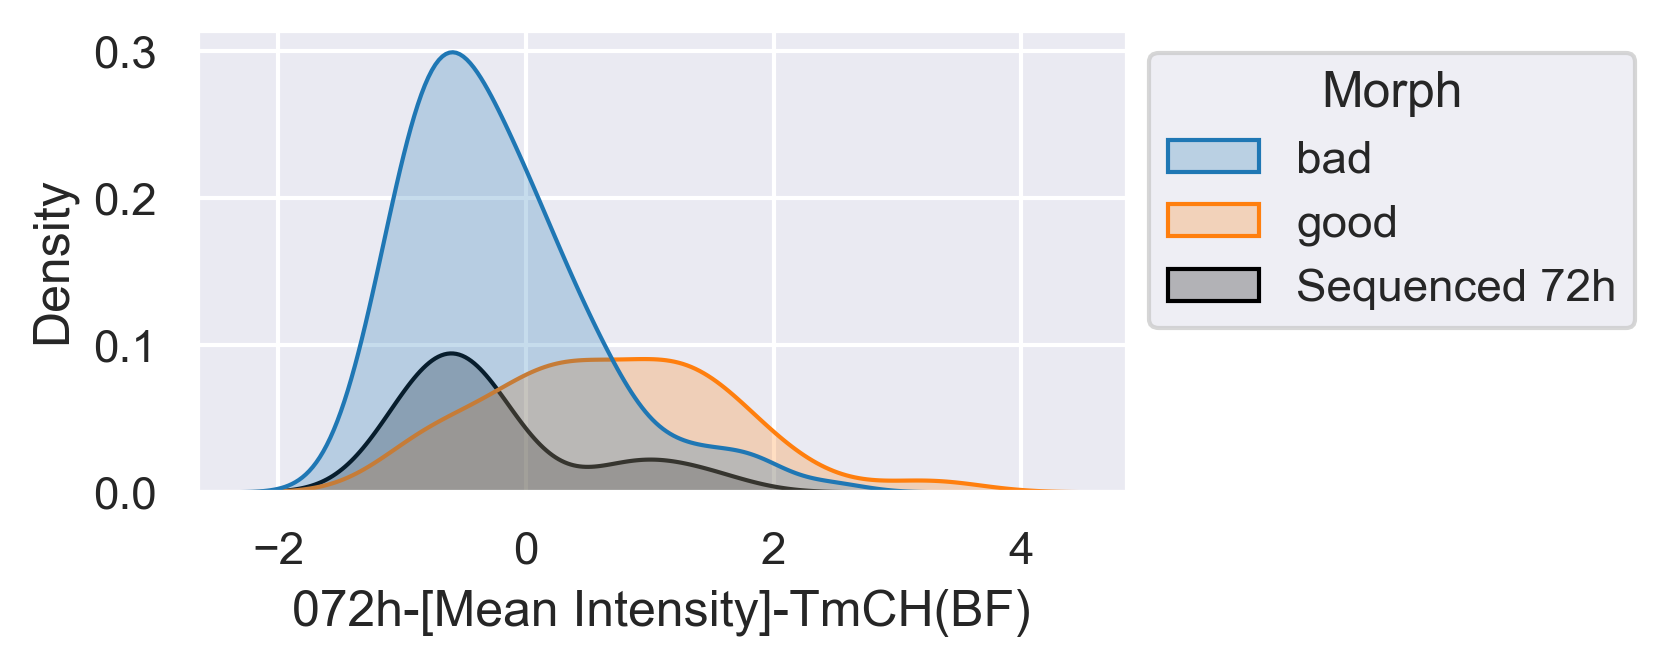

In [15]:
fig,ax = plt.subplots(1,1,figsize = (4,2))
sns.kdeplot(data=df_test_2, x=features_to_plot[0], hue="Morph", multiple='layer', fill=True,palette=cmap,hue_order=["bad","good", "Sequenced 72h"],ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig(f"{out_PLSR}/72h Mean Intensity w 72h sequenced samples.pdf", format="pdf", bbox_inches="tight")

meta NOT subset; don't know how to subset; dropped


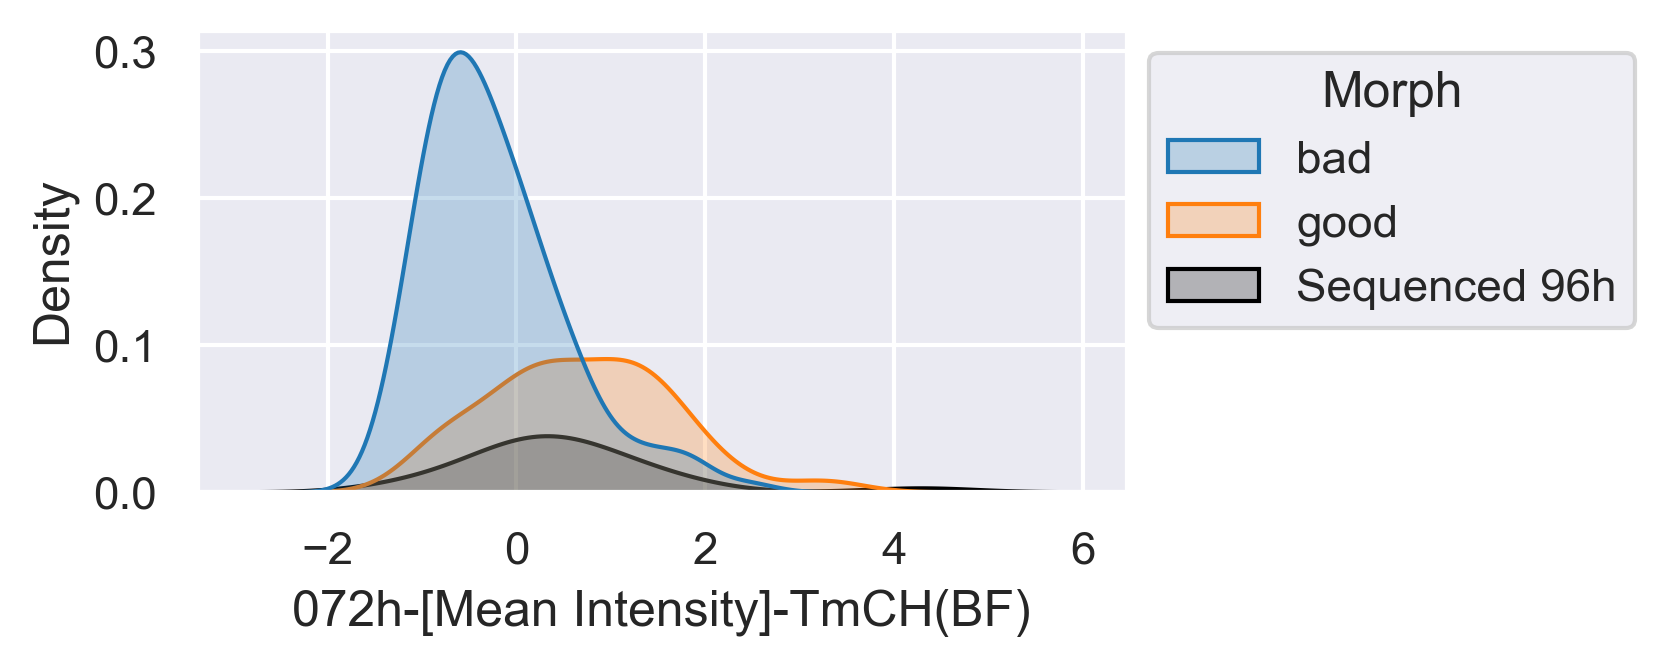

In [16]:
fig,ax = plt.subplots(1,1,figsize = (4,2))
sns.kdeplot(data=df_test_2, x=features_to_plot[0], hue="Morph", multiple='layer', fill=True,palette=cmap,hue_order=["bad","good", "Sequenced 96h"],ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig(f"{out_PLSR}/72h Mean Intensity w 96h sequenced samples.pdf", format="pdf", bbox_inches="tight")